## Introduction to Machine Learning

## Learning as an iterative process. Gradient Descent. Learning Rate


- __Ordinary Least Squares: pros and cons__
- __Gradient descent__
- __Multivariate linear regression with gradient descent__
- __Robust regression__

#### Last week we discussed:

- Linear regression  https://miro.medium.com/max/640/0*gglavDlTUWKn4Loe

- Overfit and underfit

- Train-test split

- Scaling

- Polynomial regression

### Ordinary Least Squares (OLS)

In [1]:
# lrm = LinearRegression()
# lrm.fit(X, y)

- For a lrm  =  LinearRegression() object, __lrm.fit(X, y)__ computes model coefficients to minimize mean squared error: $C = argmin(MSE)$
 by solving the __normal equation__ 

$$C = (X^TX)^{-1}X^Ty$$

where _C_ is an array of model coefficients:
$$C = [c_0, c_1, ..., c_N]$$

#### OLS Pros:

- Unique and exact solution
- Can be computed from an explicit mathematical expression


#### OLS Cons:

- Algebra slows down for larger data sets
- Exact solution may result in model overfit
- No mechanisms to compensate for overfit due to model complexity
- __Does not work for most machine learning algorithms__
- __Does not work for loss/cost/objective functions other than MSE__

__Generally, machine learning is approached as an optimization problem and is solved numerically (not analytically) using...__

### Gradient Descent (SGD)
"S" is for "stochastic"

#### Definitions

- Gradient descent (steepest descent) is an iterative optimization algorithm for finding a minimum of a function 

- In ML, gradient descent finds a set of model parameters (coefficients) to minimize a loss function such as MSE

- Mathematically, to minimize means to find a "valley" where the first derivative of the loss function w.r.t. model coefficients `= 0`

#### How does SGD work?


<img src="https://github.com/wsko/data_science_academy/blob/main/images/gradient_descent_01.gif?raw=true" alt="Bias and Variance" width="600" height="600">

<img src="https://github.com/wsko/data_science_academy/blob/main/images/gradient_descent_02.gif?raw=true" alt="Bias and Variance" width="600" height="600">


- Optional demo (homework): https://remykarem.github.io/backpropagation-demo/


#### Advantages:
 
- Gradient descent works with any generalized linear model where the coefficients cannot be computed explicitly
- Gradient descent can optimize for other loss functions, not only squared error

#### Challenges:

- Gradient descent finds a local minimum, not guaranteed to be a global solution
- Squared error (loss function) needs to be differentiable w.r.t. model coefficients

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Compare OLS and Gradient Descent 

###### Example 1
Univariate linear regression model for MEDV vs LSTAT (Boston Housing dataset). Univariate regression is easy to visualize in a 2-d plot.

In [3]:
df = pd.read_csv('https://github.com/wsko/data_science_academy/raw/main/data/Boston_Housing.csv')

In [4]:
## Build label and feature arrays
label_col = 'MEDV'
y = df[label_col].values
feature_names = list(df.columns)
feature_names.remove(label_col)
print(feature_names)
X = df[feature_names].values
print(X.shape, y.shape)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
(506, 12) (506,)


In [5]:
## for now, we need only one feature to explore OLS vs SGD
my_feature = 'LSTAT' 
X1 = df[[my_feature]].values

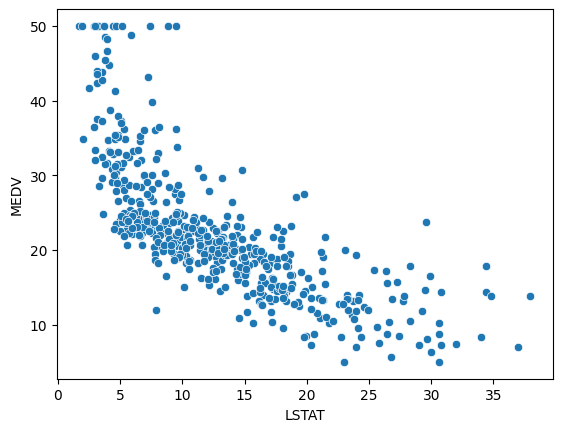

In [6]:
## univariate scatterplot
ax = sns.scatterplot(x=X1[:,0], y = y)
ax.set_xlabel(my_feature)
ax.set_ylabel("MEDV")
plt.show()

1 - Compute an OLS model and find model coefficients and MSE

In [7]:
ols = LinearRegression()
ols.fit(X1, y)
print("OLS coefficients: ",  ols.coef_)
print("OLS MSE: ", mean_squared_error(y, ols.predict(X1)))

OLS coefficients:  [-0.95004935]
OLS MSE:  38.48296722989415


2 - Compute model coefficients using Gradient Descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [8]:
sgd = SGDRegressor(random_state=42)
sgd.fit(X1, y)
print("SGD coefficients: ",  sgd.coef_)
print("SGD MSE: ", mean_squared_error(y, sgd.predict(X1)))

SGD coefficients:  [-0.96193242]
SGD MSE:  38.63009597490222


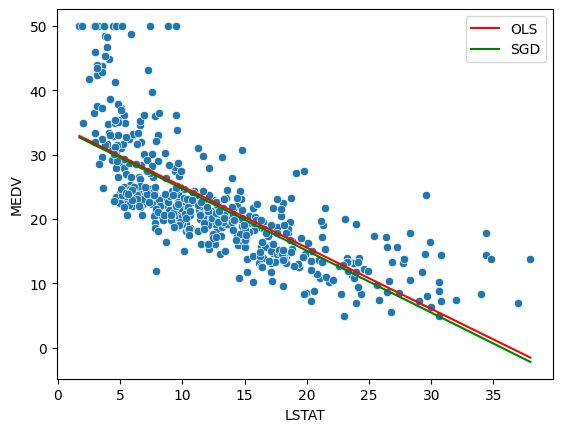

In [9]:
ax = sns.scatterplot(x=X1[:,0], y = y)
ax.set_xlabel(my_feature)
ax.set_ylabel("MEDV")
ax = sns.lineplot(x = X1[:,0], y = ols.predict(X1), color = 'red', label = "OLS")
ax = sns.lineplot(x = X1[:,0], y = sgd.predict(X1), color = 'green', label = "SGD")

##### Example 2

Now let's build a univariate linear regression model for MEDV vs INDUS

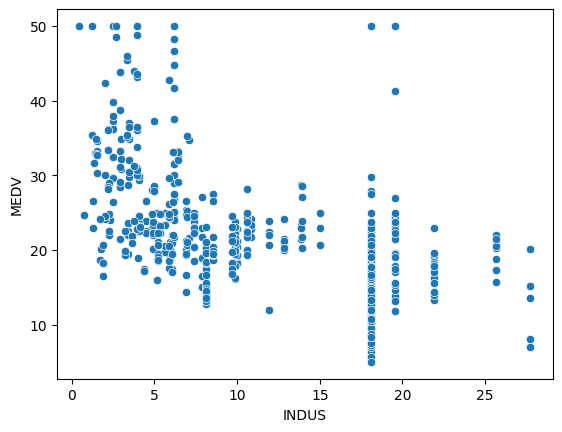

In [10]:
my_feature = 'INDUS' 
X1 = df[[my_feature]].values
ax = sns.scatterplot(x=X1[:,0], y = y)
ax.set_xlabel(my_feature)
ax.set_ylabel("MEDV")
plt.show()

In [11]:
ols = LinearRegression()
ols.fit(X1, y)
print("OLS coefficients: ",  ols.coef_)
print("OLS MSE: ", mean_squared_error(y, ols.predict(X1)))

sgd = SGDRegressor(random_state=42)
sgd.fit(X1, y)
print("SGD coefficients: ",  sgd.coef_)
print("SGD MSE: ", mean_squared_error(y, sgd.predict(X1)))

OLS coefficients:  [-0.64849005]
OLS MSE:  64.6662216410753
SGD coefficients:  [-0.74267388]
SGD MSE:  66.39648506668468


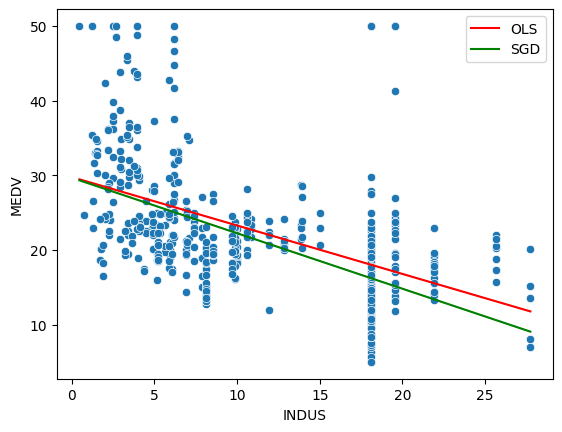

In [12]:
ax = sns.scatterplot(x=X1[:,0], y = y)
ax.set_xlabel(my_feature)
ax.set_ylabel("MEDV")
ax = sns.lineplot(x = X1[:,0], y = ols.predict(X1), color = 'red', label = "OLS")
ax = sns.lineplot(x = X1[:,0], y = sgd.predict(X1), color = 'green', label = "SGD")

- __SGD performance is not as good as OLS__

- There are additional parameters that we can adjust (note: lower MSE can also lead to model overfit)
- Learning rate, tolerance (a range where variation doesn't matter), number of iterations

In [13]:
sgd = SGDRegressor(random_state=42, eta0=0.001, tol = 0.0001, max_iter=30000)
sgd.fit(X1, y)
print("SGD coefficients: ",  sgd.coef_)
print("SGD MSE: ", mean_squared_error(y, sgd.predict(X1)))

SGD coefficients:  [-0.46030007]
SGD MSE:  67.36072806286306


How do we optimize 
- learning rate?
- tolerance?
- number of iterations?

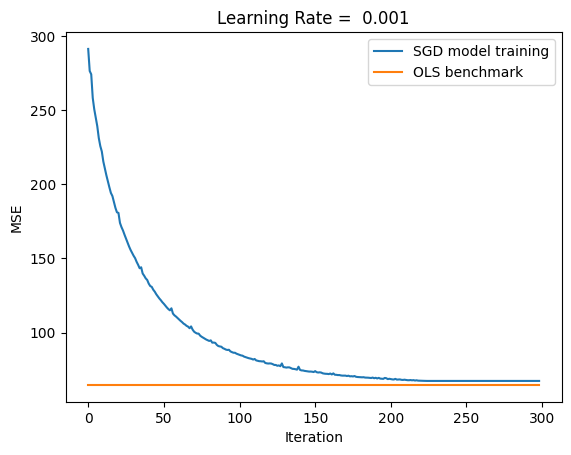

In [14]:
## try a few different values for Niter and learning_rate

Niter = 300
learning_rate = 0.001
MSE = []


for i in range(1, Niter):
    sgd = SGDRegressor(random_state=42, eta0=learning_rate, tol = 0.000001, max_iter = i)
    sgd.fit(X1, y)
    MSE.append(mean_squared_error(y, sgd.predict(X1)))

ax = sns.lineplot(x = np.arange(len(MSE)), y = MSE, label = "SGD model training")
ax = sns.lineplot(x = np.arange(len(MSE)), 
                  y = mean_squared_error(y, ols.predict(X1))*np.ones(len(MSE)), label = "OLS benchmark")
ax.set_ylabel("MSE")
ax.set_xlabel("Iteration")
ax.set_title("Learning Rate =  " + str(learning_rate))
plt.show()

### Multivariate Linear Regression with Gradient Descent

__Bigmart__ dataset from Kaggle

In [15]:
df = pd.read_csv("https://github.com/wsko/data_science_academy/raw/main/data/bigmart.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
# let's use only two numerical features 'Item_Visibility' and 'Item_MRP'

y = df['Item_Outlet_Sales'].to_numpy()
feature_names = ['Item_Visibility', 'Item_MRP']  
X_ = df[feature_names].to_numpy()
X_.shape

(8523, 2)

In [17]:
ols = LinearRegression()
ols.fit(X_, y)
print("OLS coefficients: ",  ols.coef_)
print("OLS MSE: ", mean_squared_error(y, ols.predict(X_)))
print("=======================")
sgd = SGDRegressor(random_state=42) ## always explore other arguments (learning rate, max_iter)
sgd.fit(X_, y)
print("SGD coefficients: ",  sgd.coef_)
print("SGD MSE: ", mean_squared_error(y, sgd.predict(X_)))

OLS coefficients:  [-4229.33957752    15.54841604]
OLS MSE:  1926173.6989013962
SGD coefficients:  [-1.40904233e+10  1.03567191e+10]
SGD MSE:  2.594460798828528e+24


SGD MSE is ~ $10^{24}$ indicating that something is wrong with the model...

In [18]:
#scaling: 
scaler = StandardScaler()
X_ = scaler.fit_transform(X_)

In [19]:
ols = LinearRegression()
ols.fit(X_, y)
print("OLS coefficients: ",  ols.coef_)
print("OLS MSE: ", mean_squared_error(y, ols.predict(X_)))

OLS coefficients:  [-218.21190957  968.22183726]
OLS MSE:  1926173.698901396


In [20]:
sgd = SGDRegressor(random_state=42)
sgd.fit(X_, y)
print("SGD coefficients: ",  sgd.coef_)
print("SGD MSE: ", mean_squared_error(y, sgd.predict(X_)))

SGD coefficients:  [-210.66782138  964.04666953]
SGD MSE:  1926591.5805821833


- Scaling doesn't affect OLS model error, only the coefficients
- SGD __absolutely requires feature scaling__

Let's further improve the precision of our SGD model


In [21]:
sgd = SGDRegressor(random_state=42, eta0=0.001, tol = 0.000001, max_iter = 10000)
sgd.fit(X_, y)
print("SGD coefficients: ",  sgd.coef_)
print("SGD MSE: ", mean_squared_error(y, sgd.predict(X_)))

SGD coefficients:  [-217.86934293  968.11929058]
SGD MSE:  1926174.3620461063


### Robust Linear Regression

Here is an example of what you can do with Gradient Descent regression, but not with OLS

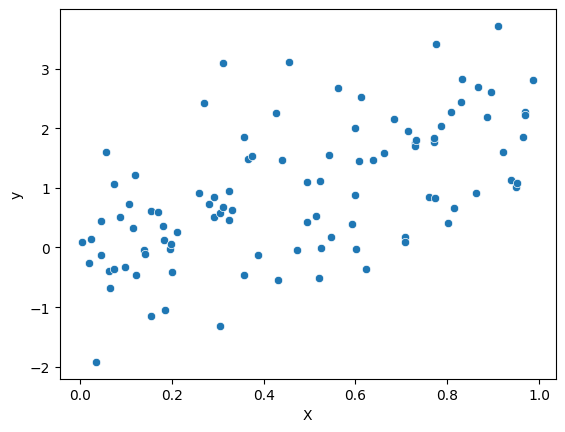

In [22]:
## Simulated data set

np.random.seed(42)
x = np.random.uniform(size = 100)
x.sort()
y = 2*x + np.random.normal(size = 100)
ax = sns.scatterplot(x=x, y = y)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

A version of the same dataset but with two significant outliers

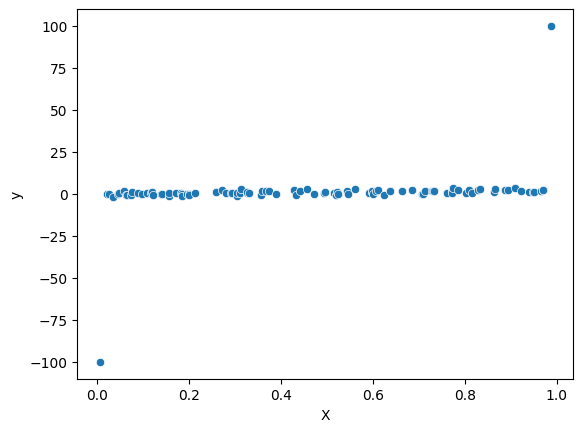

In [23]:
y1 = y.copy()
y1[0] = -100
y1[-1] = 100
ax = sns.scatterplot(x=x, y = y1)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [24]:
X = x.reshape(x.shape[0], 1)


- Let's compare OLS model coefficients with and without the outliers

In [25]:
ols = LinearRegression()
ols.fit(X, y)
print("Slope:  ", ols.coef_)
print("Error:  ", mean_squared_error(y, ols.predict(X)))

Slope:   [2.26270976]
Error:   0.8190587425203693


In [26]:
ols = LinearRegression()
ols.fit(X, y1)
print("Slope:  ", ols.coef_)
print("Error:  ", mean_squared_error(y, ols.predict(X)))

Slope:   [13.30360961]
Error:   11.50029036789292


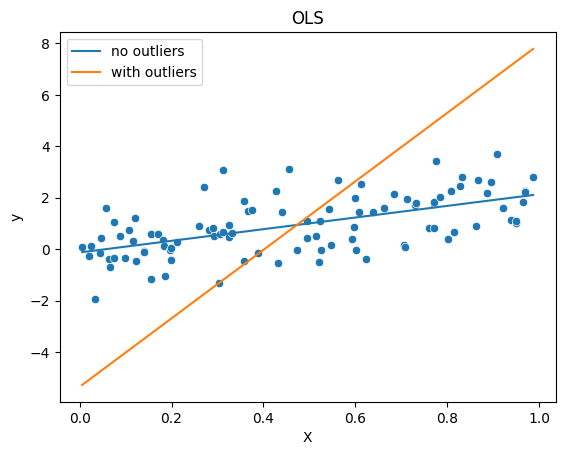

In [27]:
ax = ax = sns.scatterplot(x=x, y = y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("OLS")
ax = sns.lineplot(x = x, y = ols.fit(X, y).predict(X), label = "no outliers")
ax = sns.lineplot(x = x, y = ols.fit(X, y1).predict(X), label = "with outliers")

#### Robust Linear regression uses Huber loss instead of ordinary MSE
- https://en.wikipedia.org/wiki/Huber_loss
- OLS works only with MSE, need to use gradient descent for Huber loss

__no outliers:__

In [28]:
sgd = SGDRegressor(random_state=42, tol = 0.000001, loss = 'huber', epsilon=1)
sgd.fit(X, y)
print("Slope:  ", sgd.coef_)
print("Error:  ", mean_squared_error(y, sgd.predict(X)))

Slope:   [2.1343014]
Error:   0.8209037315031251


__with outliers__

In [29]:
sgd = SGDRegressor(random_state=42, tol = 0.000001, loss = 'huber', epsilon = 1)
sgd.fit(X, y1)
print("Slope:  ", sgd.coef_)
print("Error:  ", mean_squared_error(y1, sgd.predict(X)))

Slope:   [2.24725195]
Error:   196.44642503156493


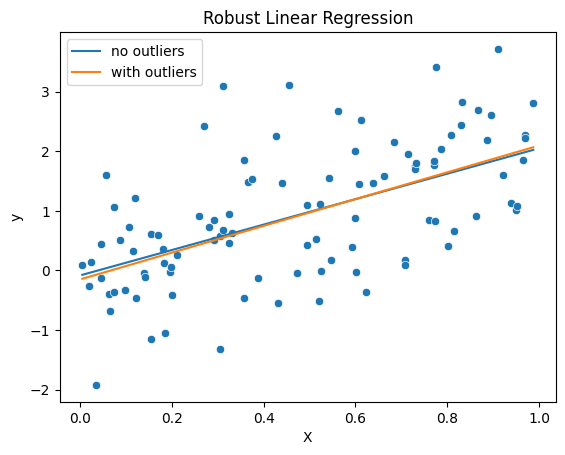

In [30]:
ax = ax = sns.scatterplot(x=x, y = y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Robust Linear Regression")
ax = sns.lineplot(x = x, y = sgd.fit(X, y).predict(X), label = "no outliers")
ax = sns.lineplot(x = x, y = sgd.fit(X, y1).predict(X), label = "with outliers")

### Summary

- Gradient descent is a numerical method
- Gradient descent has a number of "knobs" (which we will later call "hyperparameters") to adjust model performance
- Gradient descent can be used for training other parametric models and use other than Standard Error cost functions
- Multivariate regression with Gradient Descent requires feature scaling
- Gradient descent solves problem which OLS cannon handle because it always produces an exact solution and doesn't have any "knobs". Example: robust linear regression